In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Apertura archivo .dat.gz
import gzip

# Tratamiento de datos
import numpy as np

#Útil en: comparaciones de variables en análisis de datos, creación de combinaciones para modelos, evaluación de correlaciones entre pares de variables
from itertools import combinations

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ruta al archivo .dat
file_path = "files/GSS.dat"

# Definimos las posiciones (convertidas a índice base 0)
colspecs = [
    (0, 2), (2, 6), (6, 10), (10, 15), (15, 20),
    (20, 25), (25, 29), (29, 34), (34, 39), (39, 44),
    (44, 49), (49, 54), (54, 59), (59, 64), (64, 69),
    (69, 74), (74, 79), (79, 84), (84, 89), (89, 94),
    (94, 99), (99, 104), (104, 109), (109, 114), (114, 119),
    (119, 124)
]

column_names = [
    'BALLOT', 'WRKSTAT', 'INDUSTRY', 'AGE', 'SEX',
    'RINCOME', 'HAPPY', 'HAPMAR', 'HAPCOHAB', 'JOBLOSE',
    'SATJOB', 'FEJOBAFF', 'DISCAFFM', 'DISCAFFW', 'FEHIRE',
    'PROMTEFR', 'WKHARSEX', 'WKHAROTH', 'SATJOB1', 'SEXHAR',
    'HAPPY7', 'HAPUNHAP', 'UNHAPPY', 'HLTHDEP', 'ID_', 'YEAR'
]

# Cargar el archivo
gss = pd.read_fwf(file_path, colspecs=colspecs, names=column_names)

# Mostrar una muestra
gss.head()


,BALLOT,WRKSTAT,INDUSTRY,AGE,SEX,RINCOME,HAPPY,HAPMAR,HAPCOHAB,JOBLOSE,SATJOB,FEJOBAFF,DISCAFFM,DISCAFFW,FEHIRE,PROMTEFR,WKHARSEX,WKHAROTH,SATJOB1,SEXHAR,HAPPY7,HAPUNHAP,UNHAPPY,HLTHDEP,ID_,YEAR
0,1,3,-70,43,1,-90,2,-100,-100,4,1,4,3,-100,-100,2,2,2,2,-100,-100,2,-100,-70,1,2018
1,3,5,-70,74,2,-100,1,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,1,-70,2,2018
2,2,1,-70,42,1,12,1,1,-100,4,2,3,3,-100,-100,3,2,2,2,-100,-100,1,-100,-70,3,2018
3,2,1,-70,63,2,12,1,1,-100,4,1,-100,-100,3,2,3,2,2,1,-100,-100,-100,2,-70,4,2018
4,3,5,-70,71,1,-100,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,1,-70,5,2018


In [3]:
gss.shape

(9924, 26)

In [4]:
gss["HAPPY7"].value_counts()

HAPPY7
-100    7600
 3       865
 2       782
 1       282
 4       175
 5       123
-98       43
 6        34
 7         8
-97        7
-99        5
Name: count, dtype: int64



label values JOBLOSE   GSP009X;
label values SATJOB   GSP010X;
label values FEJOBAFF   GSP011X;
label values DISCAFFM   GSP012X;
label values DISCAFFW   GSP013X;
label values FEHIRE   GSP014X;
label values PROMTEFR   GSP015X;
label values WKHARSEX   GSP016X;
label values WKHAROTH   GSP017X;
label values SATJOB1   GSP018X;
label values SEXHAR   GSP019X;
label values HAPPY7   GSP020X;
label values HAPUNHAP   GSP021X;
label values BALLOT   GSP022X;
label values UNHAPPY   GSP023X;
label values HLTHDEP   GSP024X;

In [5]:
value_labels = {
    "WRKSTAT": {
        1: "Working full time", 
        2: "Working part time", 
        3: "Job, but not at work",
        4: "Unemployed", 
        5: "Retired", 
        6: "In school", 
        7: "Keeping house", 
        8: "Other",
        -99: "Unk", 
        -98: "Unk", 
        -97: "Unk", 
        -100: "Unk"
    },
    "SEX": {
        1: "Male", 
        2: "Female",
        -99: "Unk", 
        -98: "Unk"
    },
    "HAPPY": {
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk',
        1: 'Very happy',
        2: 'Pretty happy',
        3: 'Not too happy',
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',
        -97: 'Unk'
    },

    "RINCOME": {
        12: "$25000 OR MORE",
        11: "$20000 - 24999",
        10: "$15000 - 19999",
        9: "$10000 - 14999",
        8: "$8000 TO 9999",
        7: "$7000 TO 7999",
        6: "$6000 TO 6999",
        5: "$5000 TO 5999",
        4: "$4000 TO 4999",
        3: "$3000 TO 3999",
        2: "$1000 TO 2999",
        1: "LT $1000",
        -99: "Unk",
        -98: "Unk",
        -90: "Unk",
        13: "Unk",
        -97: "Unk",
        -96: "Unk",
        -95: "Unk",
        -70: "Unk",
        -60: "Unk",
        -50: "Unk",
        -40: "Unk",
        98: "Unk",
        -100: "Unk",
        -80: "Unk"
    },

    "HAPMAR": {-96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk',
        1: 'Very happy',
        2: 'Pretty happy',
        3: 'Not too happy',
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',
        -97: 'v'
    },

    "HAPCOHAB": {-96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk',
        1: 'Very happy',
        2: 'Pretty happy',
        3: 'Not too happy',
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',
        -97: 'Unk'
    },
    "JOBLOSE": { 
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk',
        1: "Very likely",
        2: "Fairly likely",
        3: "Not too likely",
        4: "Not likely",
        5: "Leaving labor force",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',
        -97: 'Unk'
    },
    
    "SATJOB": { 
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk',
        1: "Very satisfied",
        2: "Moderately satisfied",
        3: "A little dissatisfied",
        4: "Very dissatisfied",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',
        -97: 'Unk'
    },

    "FEJOBAFF": {
        1: "Strongly favor",
        2: "Not strongly favor",
        3: "Not strongly oppose",
        4: "Strongly oppose",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk',
    },

    "DISCAFFM": {
        4: "VERY UNLIKELY",
        3: "SOMEWHAT UNLIKELY",
        2: "SOMEWHAT LIKELY",
        1: "VERY LIKELY",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk'
},

    "DISCAFFW": {
        4: "VERY UNLIKELY",
        3: "SOMEWHAT UNLIKELY",
        2: "SOMEWHAT LIKELY",
        1: "VERY LIKELY",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk'
},

    "FEHIRE": {
        5: "STRONGLY DISAGREE",
        4: "DISAGREE",
        3: "NEITHER AGREE NOR DISAGREE",
        2: "AGREE",
        1: "STRONGLY AGREE",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk'
},

    "PROMTEFR": {
        4: "Not at all true",
        3: "Not too true",
        2: "Somewhat true",
        1: "Very true",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk'
},

    "WKHARSEX": {
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk',
        2: "NO",
        1: "YES"
},

    "WKHAROTH": {
        2: "NO",
        1: "YES",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk'
},

    "SATJOB1": {
        4: "Not at all satisfied",
        3: "Not too satisfied",
        2: "Somewhat satisfied",
        1: "Very satisfied",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk'
},

    "SEXHAR": {
        3: "NEVER HAVE WORKED",
        2: "NO",
        1: "YES",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk'
},

    "HAPPY7": {
        1: "COMPLETELY HAPPY",
        2: "VERY HAPPY",
        3: "FAIRLY HAPPY",
        4: "NEITHER HAPPY NOR UNHAPPY",
        5: "FAIRLY UNHAPPY",
        6: "VERY UNHAPPY",
        7: "COMPLETELY UNHAPPY",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk'
},
    
    "HAPUNHAP": {
        1: "Very happy",
        2: "Fairly happy",
        3: "Not very happy",
        4: "Not at all happy",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk'
},

    "BALLOT": {
        1: "Ballot a",
        2: "Ballot b",
        3: "Ballot c",
        4: "Ballot d",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk'
},

    "UNHAPPY": {
        5: "Very often",
        4: "Often",
        3: "Sometimes",
        2: "Rarely",
        1: "Never",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk'
},

    "HLTHDEP": {
        1: "Never",
        2: "Seldom",
        3: "Sometimes",
        4: "Often",
        5: "Very often",
        -100: 'Unk',
        -99: 'Unk',
        -98: 'Unk',        
        -97: 'Unk',
        -96: 'Unk',
        -95: 'Unk',
        -90: 'Unk',
        -80: 'Unk',
        -70: 'Unk',
        -60: 'Unk',
        -50: 'Unk',
        -40: 'Unk'
}}

In [6]:

# 4. Aplicar etiquetas al DataFrame
def apply_labels(df, label_dict):
    for column, labels in label_dict.items():
        if column in df.columns:
            df[column] = df[column].map(labels)
    return df



In [7]:
gss = apply_labels(gss, value_labels)
gss.head()

,BALLOT,WRKSTAT,INDUSTRY,AGE,SEX,RINCOME,HAPPY,HAPMAR,HAPCOHAB,JOBLOSE,SATJOB,FEJOBAFF,DISCAFFM,DISCAFFW,FEHIRE,PROMTEFR,WKHARSEX,WKHAROTH,SATJOB1,SEXHAR,HAPPY7,HAPUNHAP,UNHAPPY,HLTHDEP,ID_,YEAR
0,Ballot a,"Job, but not at work",-70,43,Male,Unk,Pretty happy,Unk,Unk,Not likely,Very satisfied,Strongly oppose,SOMEWHAT UNLIKELY,Unk,Unk,Somewhat true,NO,NO,Somewhat satisfied,Unk,Unk,Fairly happy,Unk,Unk,1,2018
1,Ballot c,Retired,-70,74,Female,Unk,Very happy,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Never,Unk,2,2018
2,Ballot b,Working full time,-70,42,Male,$25000 OR MORE,Very happy,Very happy,Unk,Not likely,Moderately satisfied,Not strongly oppose,SOMEWHAT UNLIKELY,Unk,Unk,Not too true,NO,NO,Somewhat satisfied,Unk,Unk,Very happy,Unk,Unk,3,2018
3,Ballot b,Working full time,-70,63,Female,$25000 OR MORE,Very happy,Very happy,Unk,Not likely,Very satisfied,Unk,Unk,SOMEWHAT UNLIKELY,AGREE,Not too true,NO,NO,Very satisfied,Unk,Unk,Unk,Rarely,Unk,4,2018
4,Ballot c,Retired,-70,71,Male,Unk,Pretty happy,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Never,Unk,5,2018


In [8]:
gss["HAPPY7"].value_counts()

HAPPY7
Unk                          7655
FAIRLY HAPPY                  865
VERY HAPPY                    782
COMPLETELY HAPPY              282
NEITHER HAPPY NOR UNHAPPY     175
FAIRLY UNHAPPY                123
VERY UNHAPPY                   34
COMPLETELY UNHAPPY              8
Name: count, dtype: int64

In [9]:
gss.columns

Index(['BALLOT', 'WRKSTAT', 'INDUSTRY', 'AGE', 'SEX', 'RINCOME', 'HAPPY',
       'HAPMAR', 'HAPCOHAB', 'JOBLOSE', 'SATJOB', 'FEJOBAFF', 'DISCAFFM',
       'DISCAFFW', 'FEHIRE', 'PROMTEFR', 'WKHARSEX', 'WKHAROTH', 'SATJOB1',
       'SEXHAR', 'HAPPY7', 'HAPUNHAP', 'UNHAPPY', 'HLTHDEP', 'ID_', 'YEAR'],
      dtype='object')

In [10]:
gss = gss.rename(columns={
    'BALLOT': 'Interview_ballot',
    'WRKSTAT': 'Labor_force_status',
    'INDUSTRY': 'Industry_1970',
    'AGE': 'Age',
    'SEX': 'Sex',
    'RINCOME': 'Income',
    'HAPPY': 'General_happiness',
    'HAPMAR': 'Marriage_happiness',
    'HAPCOHAB': 'Partner_relationship_happiness',
    'JOBLOSE': 'Job_loss_probability',
    'SATJOB': 'Job_satisfaction',
    'FEJOBAFF': 'Opinion_affirmative_action_for_women',
    'DISCAFFM': 'Discrimination_against_men_promotion',
    'DISCAFFW': 'Discrimination_against_women_promotion',
    'FEHIRE': 'Should_hire_and_promote_women',
    'PROMTEFR': 'Fair_promotions',
    'WKHARSEX': 'Sexually_harassed_at_work_last_12m',
    'WKHAROTH': 'Threatened_at_work_last_12m',
    'SATJOB1': 'Overall_job_satisfaction',
    'SEXHAR': 'Experienced_sexual_harassment',
    'HAPPY7': 'Self_perceived_happiness',
    'HAPUNHAP': 'Current_life_happiness',
    'UNHAPPY': 'Felt_unhappy_past_4_weeks',
    'HLTHDEP': 'Felt_depressed_past_4_weeks',
    'ID_': 'Respondent_ID',
    'YEAR': 'Survey_year'
})


In [11]:
gss.head()

,Interview_ballot,Labor_force_status,Industry_1970,Age,Sex,Income,General_happiness,Marriage_happiness,Partner_relationship_happiness,Job_loss_probability,Job_satisfaction,Opinion_affirmative_action_for_women,Discrimination_against_men_promotion,Discrimination_against_women_promotion,Should_hire_and_promote_women,Fair_promotions,Sexually_harassed_at_work_last_12m,Threatened_at_work_last_12m,Overall_job_satisfaction,Experienced_sexual_harassment,Self_perceived_happiness,Current_life_happiness,Felt_unhappy_past_4_weeks,Felt_depressed_past_4_weeks,Respondent_ID,Survey_year
0,Ballot a,"Job, but not at work",-70,43,Male,Unk,Pretty happy,Unk,Unk,Not likely,Very satisfied,Strongly oppose,SOMEWHAT UNLIKELY,Unk,Unk,Somewhat true,NO,NO,Somewhat satisfied,Unk,Unk,Fairly happy,Unk,Unk,1,2018
1,Ballot c,Retired,-70,74,Female,Unk,Very happy,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Never,Unk,2,2018
2,Ballot b,Working full time,-70,42,Male,$25000 OR MORE,Very happy,Very happy,Unk,Not likely,Moderately satisfied,Not strongly oppose,SOMEWHAT UNLIKELY,Unk,Unk,Not too true,NO,NO,Somewhat satisfied,Unk,Unk,Very happy,Unk,Unk,3,2018
3,Ballot b,Working full time,-70,63,Female,$25000 OR MORE,Very happy,Very happy,Unk,Not likely,Very satisfied,Unk,Unk,SOMEWHAT UNLIKELY,AGREE,Not too true,NO,NO,Very satisfied,Unk,Unk,Unk,Rarely,Unk,4,2018
4,Ballot c,Retired,-70,71,Male,Unk,Pretty happy,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Never,Unk,5,2018


In [12]:
gss.shape

(9924, 26)

In [13]:
gss[gss["Sex"] == "Female"].shape

(5397, 26)

In [14]:
gss["Sex"].value_counts()

Sex
Female    5397
Male      4415
Unk         88
Name: count, dtype: int64

In [15]:
gss = gss.drop(columns=["Interview_ballot", "Industry_1970"])

In [16]:
gss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9924 entries, 0 to 9923
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Labor_force_status                      9924 non-null   object
 1   Age                                     9924 non-null   int64 
 2   Sex                                     9900 non-null   object
 3   Income                                  9924 non-null   object
 4   General_happiness                       9924 non-null   object
 5   Marriage_happiness                      9924 non-null   object
 6   Partner_relationship_happiness          9924 non-null   object
 7   Job_loss_probability                    9924 non-null   object
 8   Job_satisfaction                        9924 non-null   object
 9   Opinion_affirmative_action_for_women    9924 non-null   object
 10  Discrimination_against_men_promotion    9924 non-null   object
 11  Disc

In [17]:
gss["Income"].unique()

array(['Unk', '$25000 OR MORE', '$15000 - 19999', '$1000 TO 2999',
       '$10000 - 14999', '$8000 TO 9999', '$6000 TO 6999',
       '$3000 TO 3999', '$20000 - 24999', '$7000 TO 7999', 'LT $1000',
       '$5000 TO 5999', '$4000 TO 4999'], dtype=object)

In [18]:
income_map = {
    'Unk': None,
    'LT $1000': 500,
    '$1000 TO 2999': 2000,
    '$3000 TO 3999': 3500,
    '$4000 TO 4999': 4500,
    '$5000 TO 5999': 5500,
    '$6000 TO 6999': 6500,
    '$7000 TO 7999': 7500,
    '$8000 TO 9999': 9000,
    '$10000 - 14999': 12500,
    '$15000 - 19999': 17500,
    '$20000 - 24999': 22500,
    '$25000 OR MORE': 30000  # o puedes poner 25000 como valor mínimo
}

In [19]:
gss["Income_numeric"] = gss["Income"].map(income_map)


In [20]:
gss["Income_numeric"].describe()

count     5809.000000
mean     24817.696678
std       8946.460748
min        500.000000
25%      22500.000000
50%      30000.000000
75%      30000.000000
max      30000.000000
Name: Income_numeric, dtype: float64

In [21]:
gss.columns

Index(['Labor_force_status', 'Age', 'Sex', 'Income', 'General_happiness',
       'Marriage_happiness', 'Partner_relationship_happiness',
       'Job_loss_probability', 'Job_satisfaction',
       'Opinion_affirmative_action_for_women',
       'Discrimination_against_men_promotion',
       'Discrimination_against_women_promotion',
       'Should_hire_and_promote_women', 'Fair_promotions',
       'Sexually_harassed_at_work_last_12m', 'Threatened_at_work_last_12m',
       'Overall_job_satisfaction', 'Experienced_sexual_harassment',
       'Self_perceived_happiness', 'Current_life_happiness',
       'Felt_unhappy_past_4_weeks', 'Felt_depressed_past_4_weeks',
       'Respondent_ID', 'Survey_year', 'Income_numeric'],
      dtype='object')

In [22]:
gss = gss[['Respondent_ID', 'Survey_year', 'Sex', 'Age', 'Income', 'Income_numeric',
         'Labor_force_status', 'Job_satisfaction', 'Overall_job_satisfaction',
         'Job_loss_probability', 'General_happiness', 'Self_perceived_happiness', 
         'Current_life_happiness', 'Felt_unhappy_past_4_weeks', 'Felt_depressed_past_4_weeks',
         'Marriage_happiness', 'Partner_relationship_happiness',
         'Opinion_affirmative_action_for_women', 'Should_hire_and_promote_women',
         'Discrimination_against_men_promotion', 'Discrimination_against_women_promotion',
         'Fair_promotions', 'Sexually_harassed_at_work_last_12m', 
         'Threatened_at_work_last_12m', 'Experienced_sexual_harassment']]

In [23]:
gss.head()

,Respondent_ID,Survey_year,Sex,Age,Income,Income_numeric,Labor_force_status,Job_satisfaction,Overall_job_satisfaction,Job_loss_probability,General_happiness,Self_perceived_happiness,Current_life_happiness,Felt_unhappy_past_4_weeks,Felt_depressed_past_4_weeks,Marriage_happiness,Partner_relationship_happiness,Opinion_affirmative_action_for_women,Should_hire_and_promote_women,Discrimination_against_men_promotion,Discrimination_against_women_promotion,Fair_promotions,Sexually_harassed_at_work_last_12m,Threatened_at_work_last_12m,Experienced_sexual_harassment
0,1,2018,Male,43,Unk,NaN,"Job, but not at work",Very satisfied,Somewhat satisfied,Not likely,Pretty happy,Unk,Fairly happy,Unk,Unk,Unk,Unk,Strongly oppose,Unk,SOMEWHAT UNLIKELY,Unk,Somewhat true,NO,NO,Unk
1,2,2018,Female,74,Unk,NaN,Retired,Unk,Unk,Unk,Very happy,Unk,Unk,Never,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk
2,3,2018,Male,42,$25000 OR MORE,30000.0,Working full time,Moderately satisfied,Somewhat satisfied,Not likely,Very happy,Unk,Very happy,Unk,Unk,Very happy,Unk,Not strongly oppose,Unk,SOMEWHAT UNLIKELY,Unk,Not too true,NO,NO,Unk
3,4,2018,Female,63,$25000 OR MORE,30000.0,Working full time,Very satisfied,Very satisfied,Not likely,Very happy,Unk,Unk,Rarely,Unk,Very happy,Unk,Unk,AGREE,Unk,SOMEWHAT UNLIKELY,Not too true,NO,NO,Unk
4,5,2018,Male,71,Unk,NaN,Retired,Unk,Unk,Unk,Pretty happy,Unk,Unk,Never,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk,Unk


In [24]:
gss.isna().sum()

Respondent_ID                                0
Survey_year                                  0
Sex                                         24
Age                                          0
Income                                       0
Income_numeric                            4115
Labor_force_status                           0
Job_satisfaction                             0
Overall_job_satisfaction                     0
Job_loss_probability                         0
General_happiness                            0
Self_perceived_happiness                     0
Current_life_happiness                       0
Felt_unhappy_past_4_weeks                    0
Felt_depressed_past_4_weeks                  0
Marriage_happiness                           0
Partner_relationship_happiness               0
Opinion_affirmative_action_for_women         0
Should_hire_and_promote_women                0
Discrimination_against_men_promotion         0
Discrimination_against_women_promotion       0
Fair_promotio

In [25]:
gss["Sex"] = gss["Sex"].fillna("Unk")

In [26]:
gss["Sex"].isna().sum()

0

In [27]:
gss["Age"].unique()

array([  43,   74,   42,   63,   71,   67,   59,   62,   55,   34,   61,
         44,   41,   75,   30,   40,   29,   37,   56,   82,   68,   20,
         89,   60,   65,   45,   50,   52,   46,   53,   22,   33,   23,
         28,   27,   64,   79,   32,   35,   21,   47,   70,   77,   69,
         48,   81,   78,   54,   58,   76,   39,   38,   25,   49,   18,
         19,   26,   57,   51,   36,   72,   24,   88,   66,   84,   80,
         31,   83,   73,   86,  -99,   85,   87, -100])

In [28]:
gss["Age"] = gss["Age"].replace([-99, -100], np.nan)

In [29]:
gss["Age"].describe()

count    9376.000000
mean       50.304501
std        17.769264
min        18.000000
25%        35.000000
50%        50.000000
75%        65.000000
max        89.000000
Name: Age, dtype: float64

## Visualizaciones

<Axes: xlabel='Sex', ylabel='Overall_job_satisfaction'>

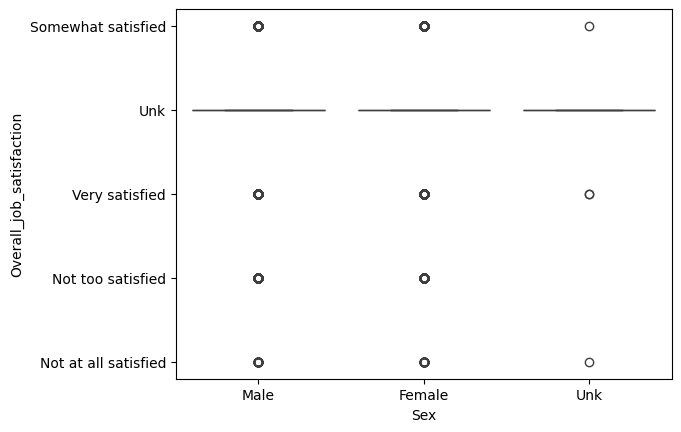

In [30]:
# Distribución de satisfacción laboral por sexo
sns.boxplot(data=gss, x='Sex', y='Overall_job_satisfaction')


<Axes: xlabel='count', ylabel='Job_loss_probability'>

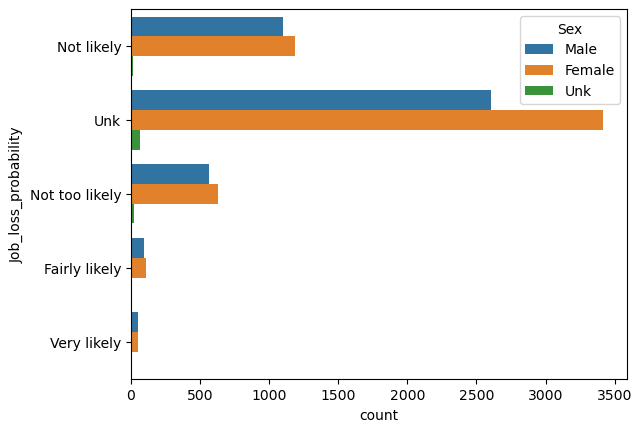

In [31]:
# Probabilidad de perder el empleo por sexo
sns.countplot(data=gss,  y='Job_loss_probability', hue="Sex")

<Axes: xlabel='count', ylabel='Discrimination_against_men_promotion'>

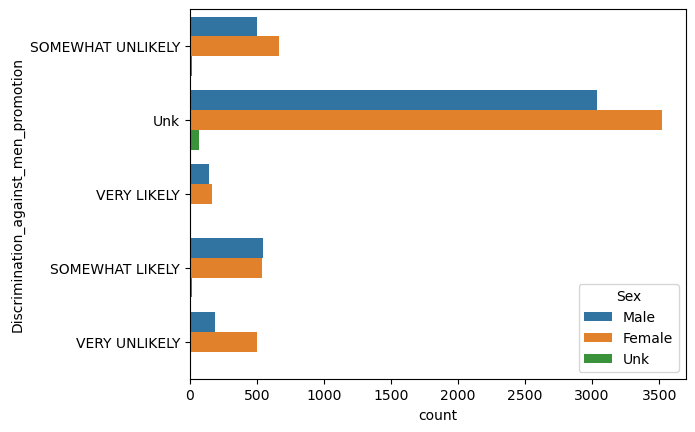

In [32]:
# Discriminación hacia los hombres en promociones por sexo
sns.countplot(data=gss, y='Discrimination_against_men_promotion', hue= "Sex")

<Axes: xlabel='count', ylabel='Discrimination_against_women_promotion'>

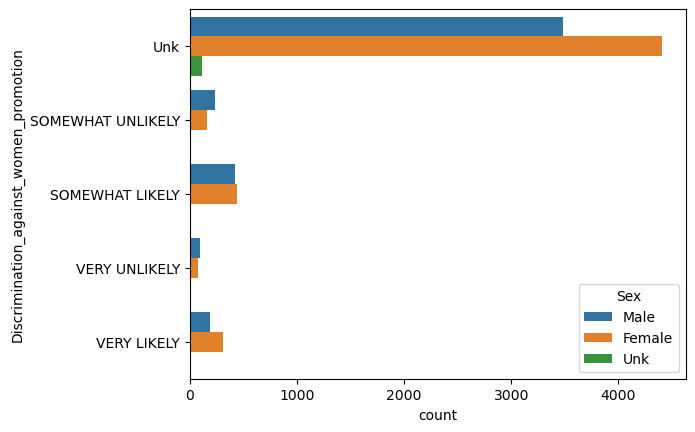

In [33]:
# Discriminación hacia las mujeres en promociones por sexo
sns.countplot(data=gss,  y='Discrimination_against_women_promotion', hue= "Sex")

<Axes: xlabel='Sexually_harassed_at_work_last_12m', ylabel='Count'>

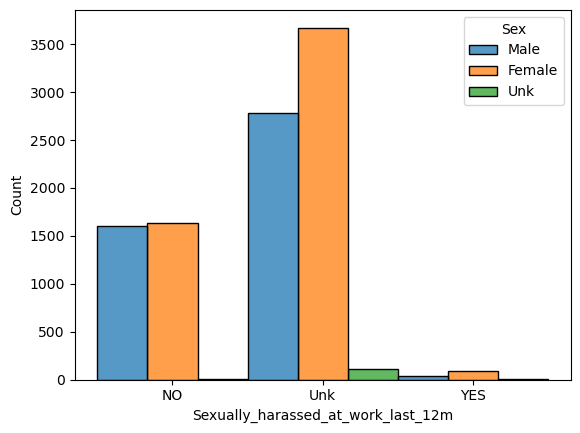

In [34]:
# Acoso laborla por sexo
sns.histplot(data=gss, x='Sexually_harassed_at_work_last_12m', hue='Sex', multiple='dodge', discrete=True)

<Axes: xlabel='Opinion_affirmative_action_for_women'>

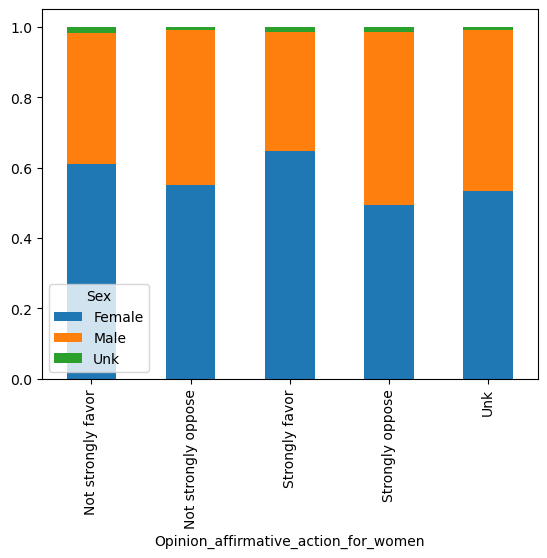

In [35]:
pd.crosstab(gss['Opinion_affirmative_action_for_women'], gss['Sex'], normalize='index').plot(kind='bar', stacked=True)


<Axes: xlabel='Sex', ylabel='Income_numeric'>

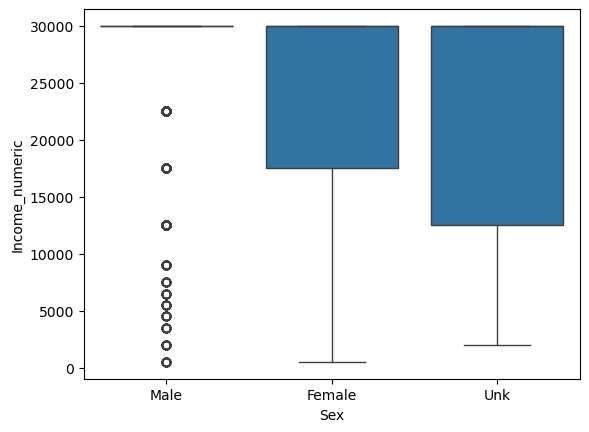

In [36]:
sns.boxplot(data=gss, x='Sex', y='Income_numeric')

<Axes: xlabel='count', ylabel='Partner_relationship_happiness'>

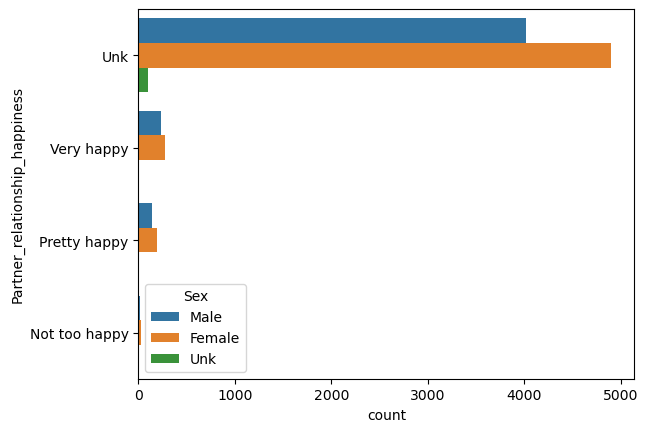

In [37]:
sns.countplot(data=gss, hue='Sex', y='Partner_relationship_happiness')

<Axes: xlabel='Age', ylabel='Felt_depressed_past_4_weeks'>

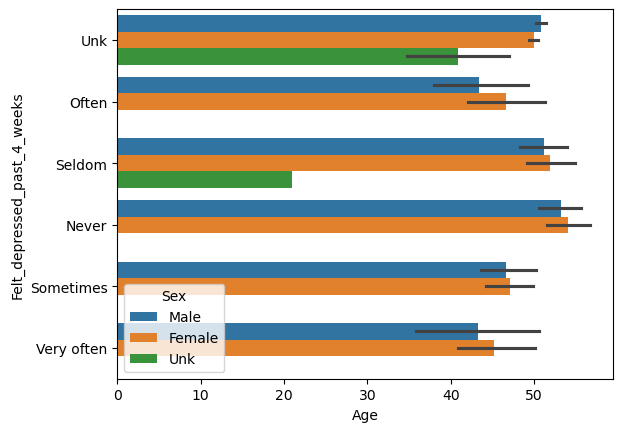

In [38]:
sns.barplot(data=gss, x='Age', y='Felt_depressed_past_4_weeks', hue='Sex')


In [40]:
# Suponiendo que tu DataFrame se llama df
total_filas = len(gss)

# Contar cuántas columnas tienen "Unk" por fila
unk_counts = (gss == "Unk").sum(axis=1)

# Definir el umbral (por ejemplo, 70% de columnas con "Unk")
threshold = int(0.7 * gss.shape[1])

# Ver cuántas filas cumplen con esa condición (las que vamos a eliminar)
filas_a_eliminar = (unk_counts > threshold).sum()

print(f"Total de filas: {total_filas}")
print(f"Filas con más del {round(threshold / gss.shape[1] * 100)}% de 'Unk': {filas_a_eliminar}")
print(f"Filas que se quedarán: {total_filas - filas_a_eliminar}")




Total de filas: 9924
Filas con más del 68% de 'Unk': 190
Filas que se quedarán: 9734


In [41]:
# Filtrar el DataFrame
gss_cleaned = gss[unk_counts <= threshold]

In [44]:
gss["Self_perceived_happiness"].value_counts()

Self_perceived_happiness
Unk                          7655
FAIRLY HAPPY                  865
VERY HAPPY                    782
COMPLETELY HAPPY              282
NEITHER HAPPY NOR UNHAPPY     175
FAIRLY UNHAPPY                123
VERY UNHAPPY                   34
COMPLETELY UNHAPPY              8
Name: count, dtype: int64

In [46]:
gss["Felt_depressed_past_4_weeks"].value_counts()

Felt_depressed_past_4_weeks
Unk           8797
Never          386
Seldom         310
Sometimes      270
Often           91
Very often      70
Name: count, dtype: int64

In [47]:
gss["Partner_relationship_happiness"].value_counts()

Partner_relationship_happiness
Unk              9015
Very happy        523
Pretty happy      343
Not too happy      43
Name: count, dtype: int64

In [43]:
gss_cleaned.to_csv("files/gss_data_clean.csv", index=False)